Convolution Neural Networks (CNN)

In [ ]:
#ANN
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import datasets, layers, models


In [ ]:
(X_train, y_train),(X_test, y_test)=datasets.cifar10.load_data()

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train=y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[int(y[index])]) # Cast y[index] to an integer


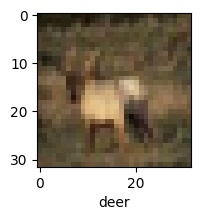

In [ ]:
plot_sample(X_train, y_train, 3)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0   #normalizing

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 150s 96ms/step - accuracy: 0.3078 - loss: 1.9294
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 192s 90ms/step - accuracy: 0.4157 - loss: 1.6499
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 88ms/step - accuracy: 0.4521 - loss: 1.5515
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 89ms/step - accuracy: 0.4754 - loss: 1.4961
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 90ms/step - accuracy: 0.4943 - loss: 1.4459


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step
Classification report: 
               precision    recall  f1-score   support

           0       0.62      0.41      0.49      1000
           1       0.50      0.73      0.60      1000
           2       0.37      0.37      0.37      1000
           3       0.45      0.20      0.27      1000
           4       0.46      0.33      0.38      1000
           5       0.49      0.29      0.36      1000
           6       0.43      0.70      0.53      1000
           7       0.53      0.57      0.55      1000
           8       0.49      0.71      0.58      1000
           9       0.52      0.52      0.52      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.47     10000
weighted avg       0.49      0.48      0.47     10000



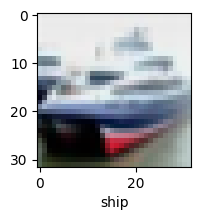

In [ ]:
plot_sample(X_test, y_test, 1)

In [ ]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.4878 - loss: 1.4559


[1.4595530033111572, 0.4821999967098236]

In [ ]:
#(CNN)
cnn=models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 44ms/step - accuracy: 0.3622 - loss: 1.7324
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.5686 - loss: 1.2227
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.6397 - loss: 1.0418
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.6683 - loss: 0.9500
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.6983 - loss: 0.8669
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 44ms/step - accuracy: 0.7183 - loss: 0.8184
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 42ms/step - accuracy: 0.7313 - loss: 0.7685
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 44ms/step - accuracy: 0.7484 - loss: 0.7198
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 46ms/step - accuracy: 0.7647 - loss: 0.6801
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.7746 - loss: 0.6509


In [ ]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.7056 - loss: 0.8784


[0.8986971974372864, 0.7013999819755554]

In [ ]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


array([[1.57135515e-03, 1.34779984e-05, 2.76249554e-03, 9.13274825e-01,
        2.96074199e-03, 5.59395663e-02, 1.20688705e-02, 8.08254408e-05,
        1.13012642e-02, 2.65741364e-05],
       [5.26102632e-03, 1.46208480e-01, 6.58473218e-05, 1.08027912e-07,
        2.51136498e-07, 1.00407327e-07, 1.35612282e-07, 1.29568591e-07,
        8.48347604e-01, 1.16273390e-04],
       [2.43816942e-01, 4.44145471e-01, 1.62452972e-03, 6.31633447e-03,
        9.12587997e-03, 1.72158878e-03, 1.83597615e-03, 3.15981521e-03,
        2.59847581e-01, 2.84057073e-02],
       [9.58081901e-01, 6.28432399e-03, 8.81542917e-03, 2.02011201e-03,
        1.34177748e-02, 2.25815966e-04, 8.17459426e-04, 3.54447868e-03,
        4.78757080e-03, 2.00505857e-03],
       [2.11601059e-06, 3.38567515e-05, 9.24207736e-03, 1.66222807e-02,
        3.47268760e-01, 9.14988806e-04, 6.25898004e-01, 2.75727780e-06,
        1.18692060e-05, 3.33397179e-06]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

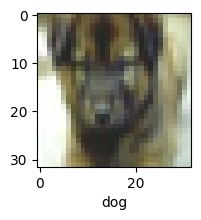

In [ ]:
plot_sample(X_test, y_test, 33)

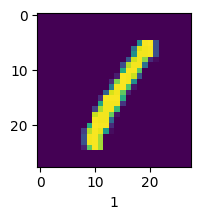

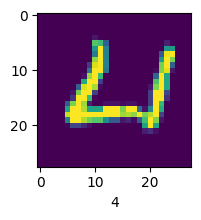

In [ ]:
#MNIST dataset
(X_train, y_train),(X_test, y_test)=datasets.mnist.load_data()

y_train=y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(y[index])

plot_sample(X_train, y_train, 3)

plot_sample(X_test, y_test, 33)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 96s 51ms/step - accuracy: 0.8141 - loss: 0.8441
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 119s 39ms/step - accuracy: 0.9266 - loss: 0.2613
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 92s 49ms/step - accuracy: 0.9402 - loss: 0.2114
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 152s 55ms/step - accuracy: 0.9517 - loss: 0.1718
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 135s 51ms/step - accuracy: 0.9586 - loss: 0.1491


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.97      0.95      0.96      1032
           3       0.94      0.97      0.95      1010
           4       0.95      0.96      0.96       982
           5       0.97      0.94      0.95       892
           6       0.95      0.97      0.96       958
           7       0.96      0.95      0.96      1028
           8       0.94      0.95      0.94       974
           9       0.96      0.93      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [ ]:
cnn=models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 32ms/step - accuracy: 0.8965 - loss: 0.3301
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 29ms/step - accuracy: 0.9840 - loss: 0.0514
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9892 - loss: 0.0343
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9920 - loss: 0.0236
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9953 - loss: 0.0156
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 29ms/step - accuracy: 0.9954 - loss: 0.0148
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9959 - loss: 0.0128
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.9966 - loss: 0.0096
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9980 - loss: 0.0059
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9971 - loss: 0.0085


In [ ]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9886 - loss: 0.0514


[0.038746945559978485, 0.9918000102043152]

In [ ]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


array([[1.1941565e-12, 3.3058118e-12, 2.5369407e-09, 2.4150043e-10,
        1.8344554e-13, 3.5296240e-13, 4.1838734e-20, 9.9999994e-01,
        2.1877803e-13, 1.9085018e-11],
       [1.2566055e-12, 4.9190512e-17, 9.9999994e-01, 2.5546460e-19,
        1.4386326e-15, 1.4777331e-25, 2.4983104e-12, 2.1252871e-21,
        1.3774148e-17, 3.2890624e-20],
       [5.1303353e-09, 9.9999982e-01, 1.8718109e-09, 3.8816606e-13,
        2.4364049e-08, 1.9545626e-10, 2.0318278e-09, 3.8682931e-08,
        1.3438645e-07, 2.4331467e-10],
       [9.9999994e-01, 5.1709881e-20, 1.1035447e-12, 1.3262401e-16,
        2.9591094e-15, 9.1069832e-15, 2.1236884e-08, 1.8149498e-15,
        7.6904581e-14, 2.3392184e-12],
       [2.2733058e-11, 8.2468621e-10, 2.4780691e-11, 9.5973161e-15,
        9.9999744e-01, 3.0390735e-11, 4.0443569e-12, 7.9850596e-13,
        6.6673027e-09, 2.4484671e-06]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

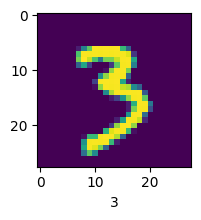

In [ ]:
plot_sample(X_test, y_test, 30)

In [ ]:
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
classes[y_classes[30]]

'3'